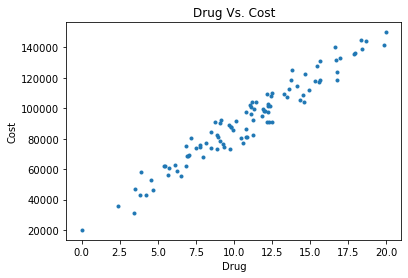

In [52]:
#Read Dataset
import pandas as pd
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

x, y, coef = datasets.make_regression(n_samples=100,#number of samples
                                      n_features=1,#number of features
                                      n_informative=1,#number of useful features 
                                      noise=10,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=0) #set for same data points for each run

x = np.interp(x, (x.min(), x.max()), (0, 20))
y = np.interp(y, (y.min(), y.max()), (20000, 150000))

plt.ion() #interactive plot on
plt.plot(x,y,'.',label='training data')
plt.xlabel('Drug');plt.ylabel('Cost')
plt.title('Drug Vs. Cost')

data = pd.DataFrame(data={'drug':x.flatten(),'cost':y})
data.to_csv('linear_data.csv', index=False)

In [53]:
#data.info()
#data.describe()
data.head()

,drug,cost
0,9.096218,78311.160754
1,14.637429,103897.664526
2,12.255808,97836.261015
3,7.215160,80550.256380
4,6.905628,68555.820963


In [54]:
#Split Dataset
X = data[['drug']]
Y = data[['cost']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)


In [55]:
X_train.shape

(80, 1)

In [56]:
X_test.shape

(20, 1)

In [57]:
#Train Classifier
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
print("Intercept: \n", regr.intercept_)

Coefficients: 
 [[6392.82384003]]
Intercept: 
 [22546.18656843]


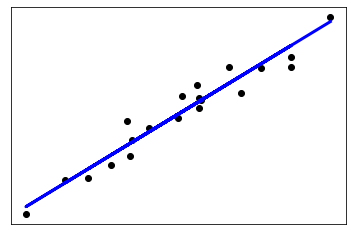

In [58]:
# Prediction Metrics and Plot

plt.scatter(X_test['drug'], y_test, color="black")
plt.plot(X_test['drug'], y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()




In [59]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    

Mean Absolute Error: 4998.793916347512
Mean Squared Error: 37294393.1196817
Root Mean Squared Error: 6106.913551024093


In [60]:
test_instance = [[12]]
print('Predicted cost:',regr.predict(test_instance)[0])

Predicted cost: [99260.07264874]
